Display images in jupyter web UI
* `show(img_1, img_2)` will draw each image on a separate row
* `show([img_1, img_2])` will draw both images in one row
* `show([img_1, img_2], [img_3, img_4])` will draw two rows of two images

Specifying the format:  
* `show(..., fmt='webp')`: image format, usually png jpeg webp

Whether to try converting unusual shapes and datatypes to the needed RGB:  
* `show(..., adapt=True or False)`

Convenience functions `imread`, `imwrite` are also provided (based on PIL).

In [7]:
from jupyter_show_image import show
import numpy as np

### Grid


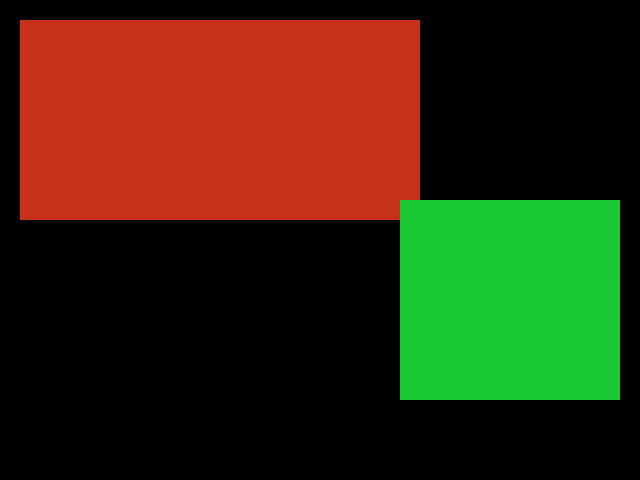


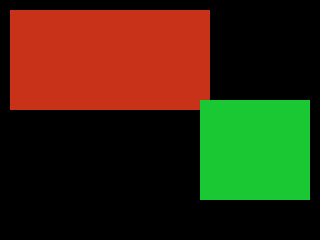
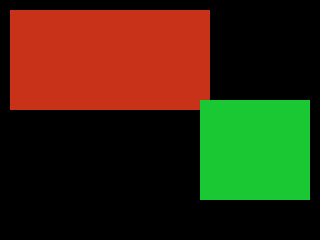
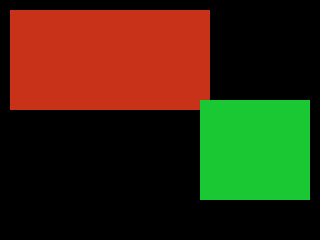
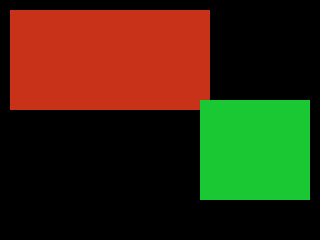

In [5]:
img = np.zeros((480, 640, 3), dtype=np.uint8)
img[20:220, 20:420] = (200, 50, 25)
img[200:400, 400:620] = (25, 200, 50)
img_s = img[::2, ::2]

show(img, fmt='png')

show([img_s, img_s], [img_s, img_s], fmt='png')

### Conversion

* HxWx3 float is converted from 0...1 to 0...255
* Hxwx**1** is converted using a color-map
* Boolean image is shown as black vs white



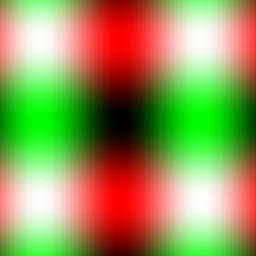
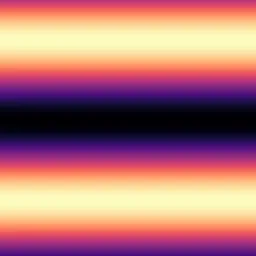
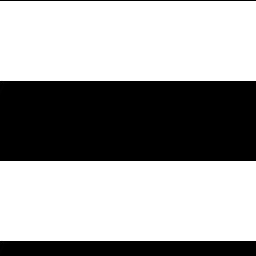

In [8]:
w = 256
sh = (w, w)
val = np.sin(np.linspace(0, 10, w)) * 0.5 + 0.5
img = np.stack([
	np.broadcast_to(val[:, None], sh),
	np.broadcast_to(val[None, :], sh),
	val[:, None] @ val[None, :],
], axis=2)

show([img, img[:, :, 0], img[:, :, 0] > 0.5])


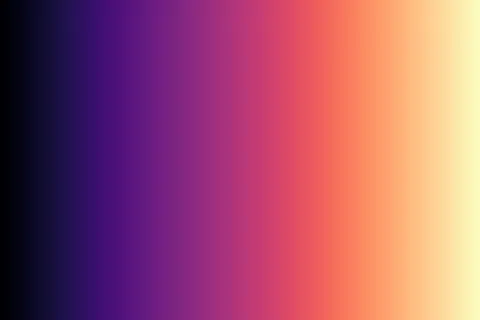
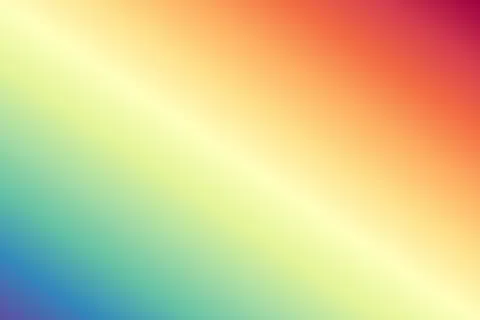

In [6]:
def make_coord_field(w_h, norm=False, dtype=np.float32):
	w, h = w_h
	field_xy = np.transpose(np.mgrid[0:w, 0:h].astype(dtype), [2, 1, 0])
	if norm:
		field_xy *= (1. / np.array([w-1, h-1]))
	return field_xy

field_xy_norm = make_coord_field((480, 320), norm=True)

field_x = field_xy_norm[:, :, 0]
field_diagonal = field_xy_norm @ [1, -1]

show([field_x, field_diagonal])